In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../../data/external/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df=df.drop(columns='Id')

In [9]:
num_rows_with_nan = df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

Number of rows with NaN values: 0


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


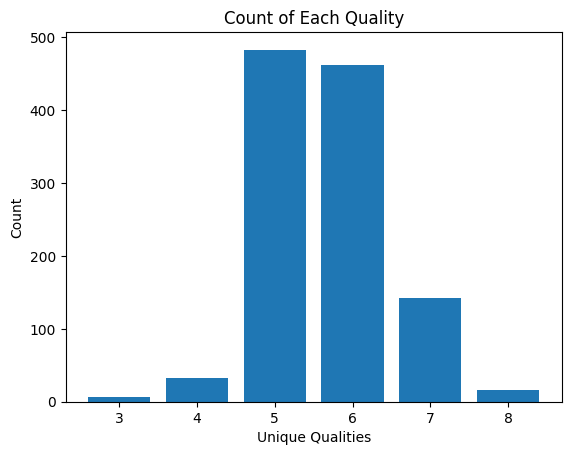

In [15]:
y=df['quality'].values
unique_qualities, count = np.unique(y, return_counts=True)
plt.bar(unique_qualities, count)
plt.xlabel('Unique Qualities')
plt.ylabel('Count')
plt.title('Count of Each Quality')
plt.savefig('./figures/wineqt_bar.jpg')
plt.show()

In [16]:
df = df.sample(frac=1).reset_index(drop=True)
cols=df.columns
df[cols] = df[cols].apply(lambda x: (x - x.mean()) / x.std())
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.309736,-0.953825,1.686120,-0.244965,1.376582,-0.840495,-0.851522,0.971181,-1.729911,2.360888,-0.962960,-0.815367
1,-0.406908,-0.285797,0.211688,0.197540,-0.358231,-1.133164,-0.943035,0.103679,-0.580956,-0.632093,-0.131318,0.425598
2,-1.150788,0.103886,-0.601792,-0.539968,-0.210137,1.013075,-0.332947,-1.865084,0.057353,0.952426,1.069944,0.425598
3,0.165307,1.495611,-0.805162,-0.171214,-0.062044,-0.352714,-0.454964,0.607557,0.568000,-1.042894,-0.500937,-0.815367
4,-0.349687,2.247143,0.821798,-0.244965,0.572644,0.622850,2.076903,0.140041,-0.389463,0.424253,-1.147770,-0.815367
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-0.635794,0.549238,-1.211902,-0.244965,-0.146669,0.135068,1.283788,0.373799,1.397801,-0.456035,-0.593341,0.425598
1139,1.481401,-1.176501,1.279381,-0.539968,0.953457,0.135068,-0.058407,0.316658,-0.197971,0.658997,0.977539,0.425598
1140,-0.521351,-0.953825,0.110003,0.050038,0.001425,1.013075,0.795717,-0.145663,0.504169,0.130824,0.515515,-0.815367
1141,-0.635794,-0.174459,-0.449264,-0.318716,-0.337075,-0.352714,-0.454964,0.456913,1.333970,0.365567,-0.778151,0.425598


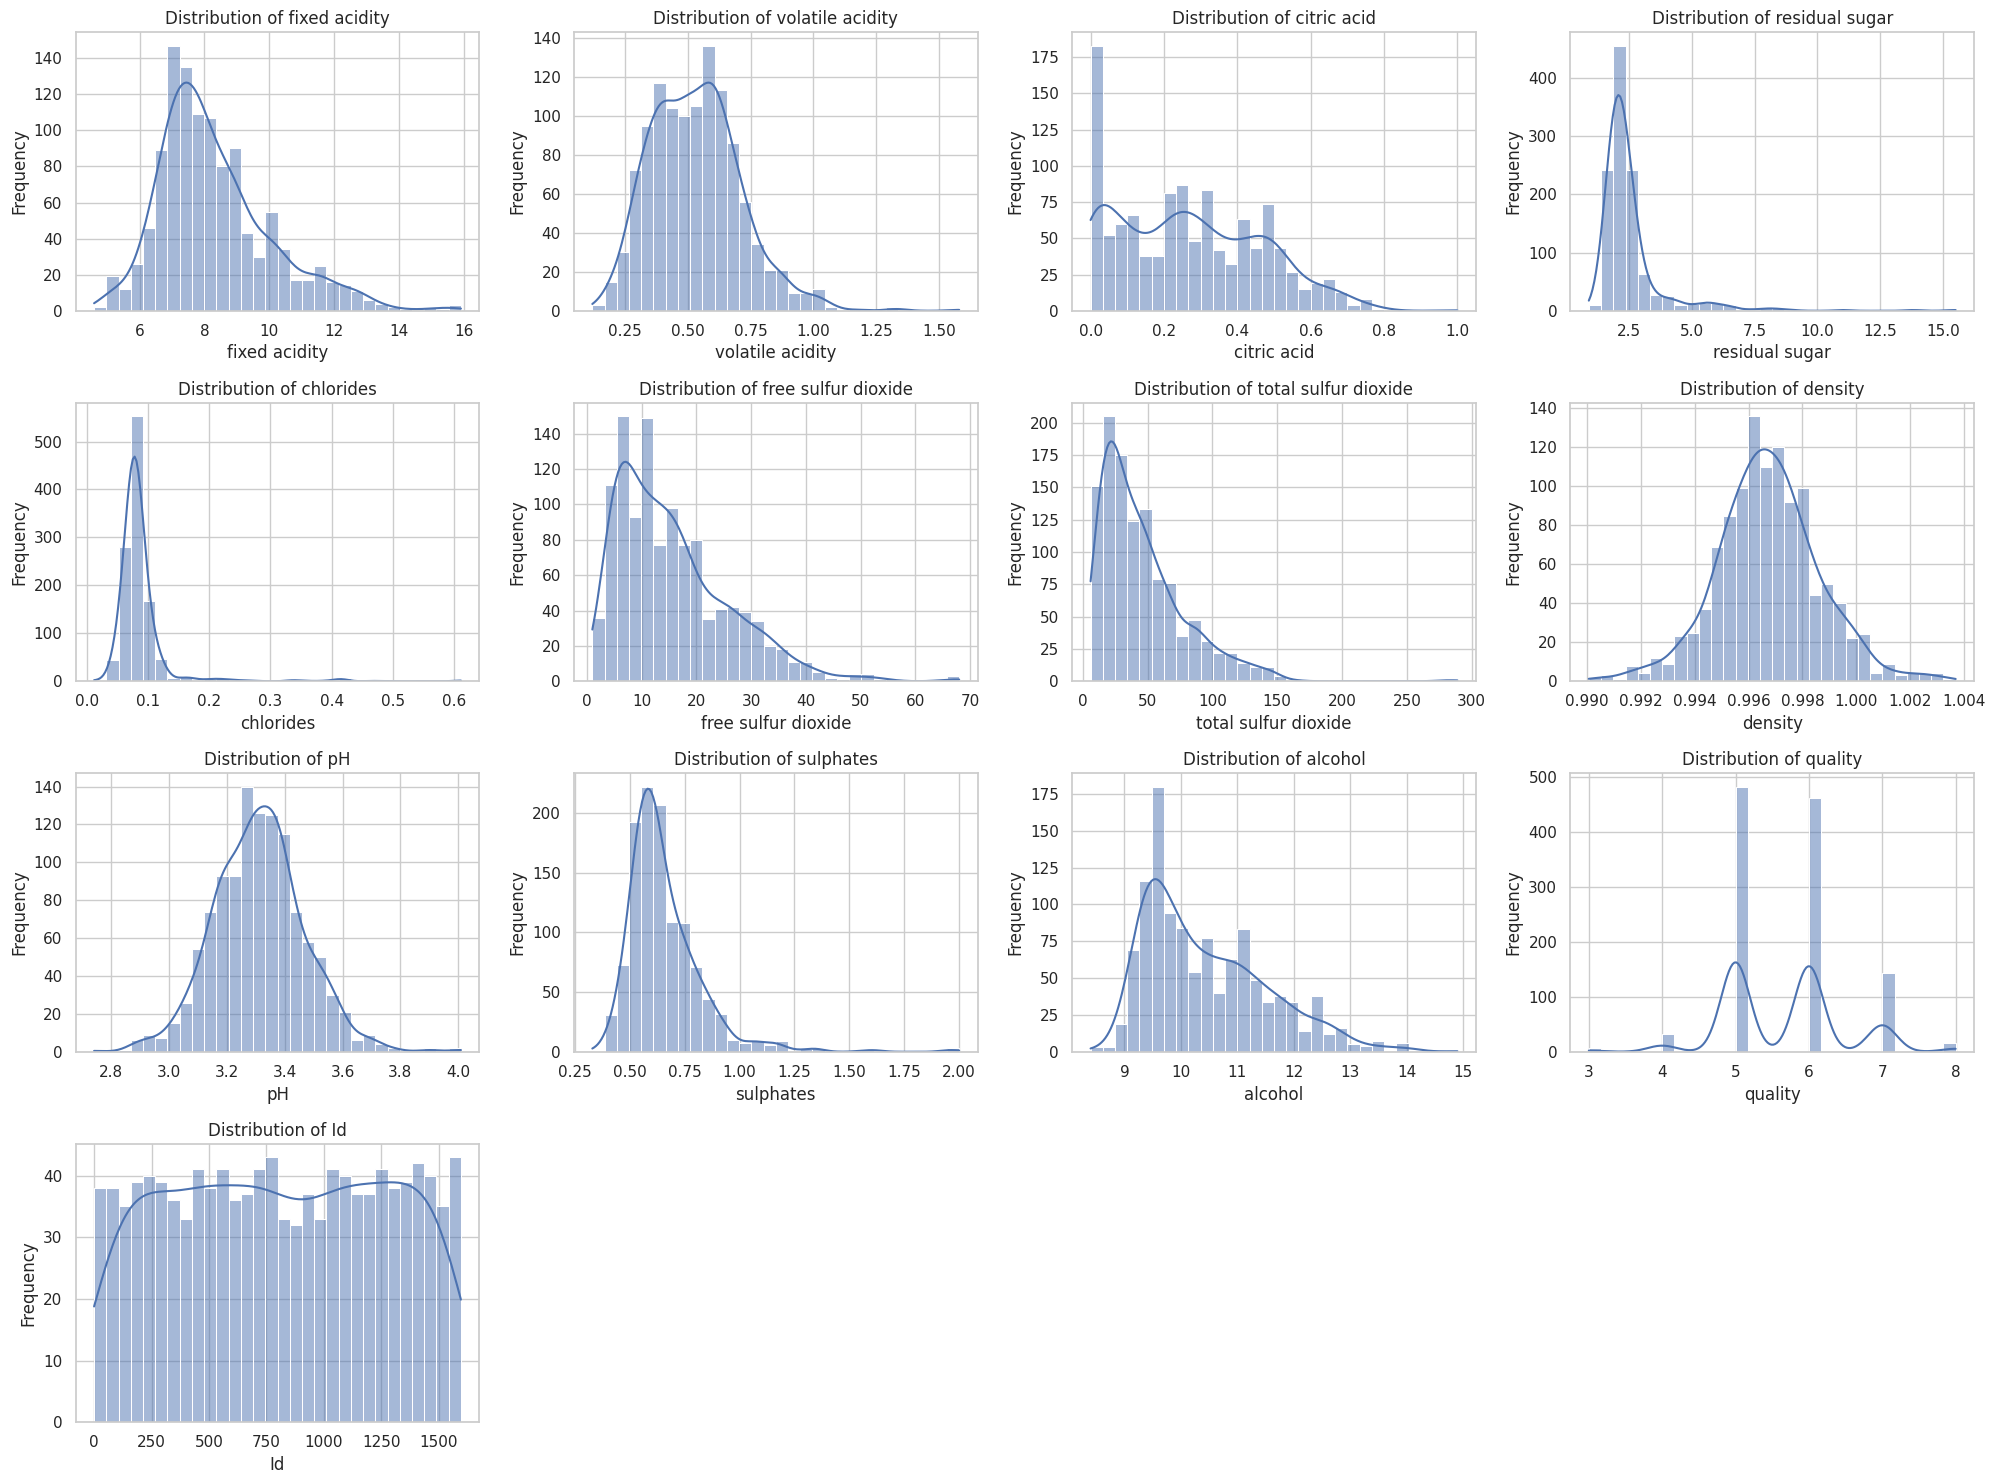

In [9]:
df=pd.read_csv("../../../data/external/WineQT.csv")

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Plot distribution of each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('../figures/wineqt_distributions.jpg')
plt.show()